# Homework Assignment 3
Return this notebook (filled with your answers) by the deadline via mycourses. Also provide pdf printout of the notebook.

Note that the notebook that you submit needs to work. Reduction of points may be possible if it does not.

All questions have same weight when grading.

Name: **Xingji Chen** <br>
Student number: **101659554**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import lasso_path, enet_path
import statsmodels.api as sm

In [2]:
from tqdm import tqdm
import seaborn as sns

In [3]:
# might be useful in some installations)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

##  Question 1: look at the data (basic operations)  
**Load the data in _prostate.csv_ to your workspace.** The example data originates from a 1989 study by Stamey et al., which explored the correlation between Prostate Specific Antigen (PSA) levels and various clinical measures in 97 men about to receive radical prostatectomy. The objective is to predict the logarithm of PSA (lpsa) using several measurements. These include:
- the logarithm of cancer volume (lcavol),
- logarithm of prostate weight (lweight),
- age,
- logarithm of benign prostatic hyperplasia amount (lbph),
- seminal vesicle invasion (svi),
- logarithm of capsular penetration (lcp),
- Gleason score (gleason),
- the percentage of Gleason scores 4 or 5 (pgg45).

Taking the logarithm of various features is a common feature engineering techique. It often reduces the scale of outliers, and transforms skewed datasets closer to normal distributions.

In [4]:
data_table = pd.read_csv('datasets/prostate.csv', sep='\t')
predictors = list(data_table.columns[:-2])
print(predictors)
data_table.head(5)

['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


### 1 a)
Make a  scatterplot matrix of the prostate cancer variables,  where the first row shows the response against each of the predictors in turn.

**Hint:** you should get the same picture that  is displayed in Figure 1.1., page 3,  of  Hastie et al. (2017). 
https://hastie.su.domains/ElemStatLearn/printings/ESLII_print12_toc.pdf

<div>
<img src="./figures/scatterplot_matrix.png" width="500"/>
</div>


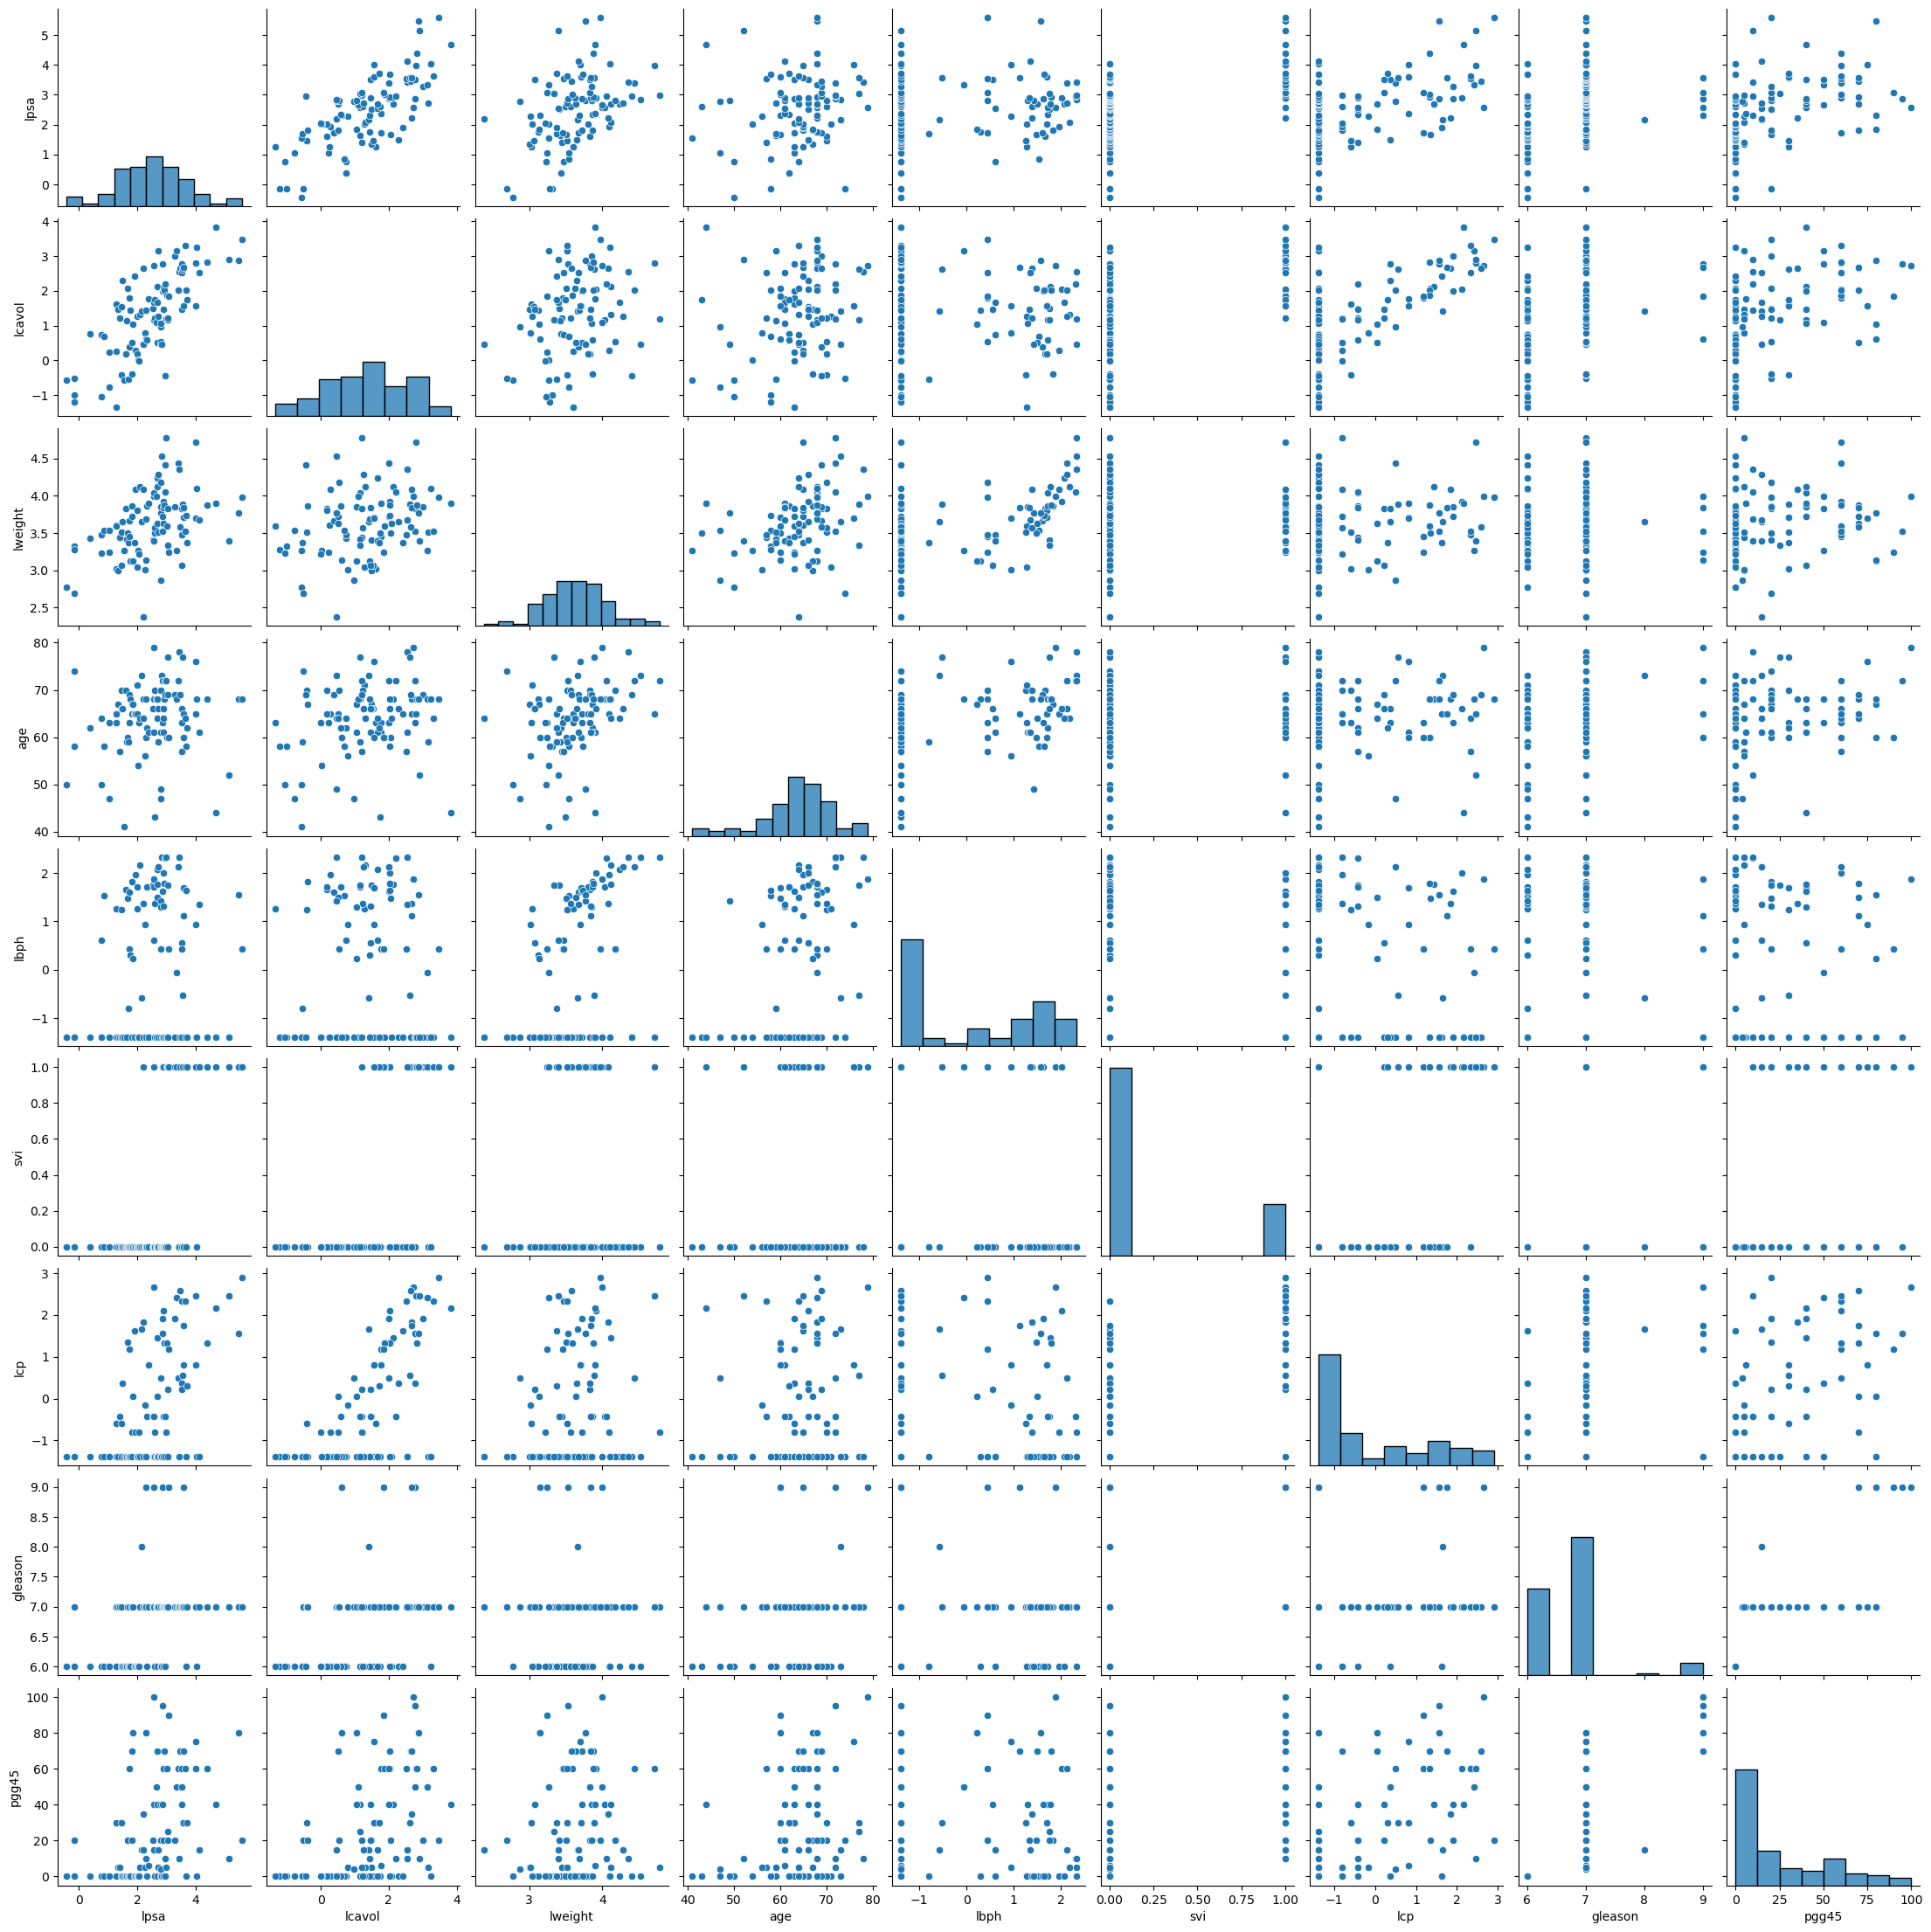

In [5]:
# your solution here

cols = ['lpsa'] + [col for col in data_table.columns if col != 'lpsa']
data_table1 = data_table[cols]

sns.pairplot(data_table1)
plt.show()

### 1 b)
Center and standardize all predictors to have a mean of zero and unit sample variance. Do this by hand or by using tools from `sklearn`.

In [6]:
# your solution here

scaler = StandardScaler()

# Fit and transform the predictors
data_table[predictors] = scaler.fit_transform(data_table[predictors])

data_table.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-1.645861,-2.016634,-1.872101,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-0.430783,T
1,-1.999313,-0.725759,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-0.162519,T
2,-1.587021,-2.200154,1.368234,-1.030029,-0.525657,-0.867655,0.344407,-0.156155,-0.162519,T
3,-2.178174,-0.812191,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-0.162519,T
4,-0.510513,-0.461218,-0.251933,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,0.371564,T


### 1 c) 
Split data into the training and test sets, according to the labels in the `train` column of the `data_table`

In [7]:
# your solution here

train_data = data_table[data_table['train'] == 'T']

test_data = data_table[data_table['train'] == 'F']

### 1 d)
* Fit a LS linear regression (with intercept) on the training set.  Report the estimated regression coefficients
* **Plot the residuals versus observation number.** 

Hint: you should get exactly the same results as given in Table 3.2, page 50, of Hastie et al. (2017, 12th print) https://hastie.su.domains/ElemStatLearn/printings/ESLII_print12_toc.pdfand shown below: 
| Term | Coefficient | Std. Error | Z Score|
| -- | -- | -- | -- |
| Intercept | 2.46 | 0.09 | 27.60 |
lcavol | 0.68 | 0.13 | 5.37 |
lweight | 0.26 | 0.10 | 2.75 |
age | −0.14 | 0.10 | −1.40 |
lbph | 0.21 | 0.10 | 2.06 |
svi | 0.31 | 0.12 | 2.47 |
lcp | −0.29 | 0.15 | −1.87 |
gleason | −0.02 | 0.15 | −0.15 |
pgg45 | 0.27 | 0.15 | 1.74 |

Solution: **LS fitting and printing the results**

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     16.47
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           2.04e-12
Time:                        11:11:13   Log-Likelihood:                -67.505
No. Observations:                  67   AIC:                             153.0
Df Residuals:                      58   BIC:                             172.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4649      0.089     27.598      0.0

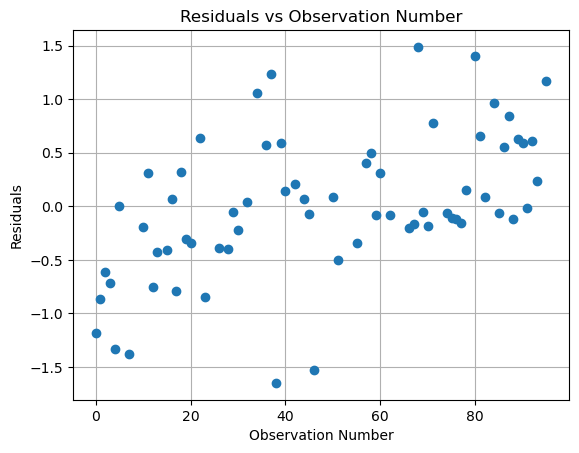

In [8]:
# your solution here

X_train = train_data.drop(['train', 'lpsa'], axis=1)
y_train = train_data['lpsa']

X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()

print(model.summary())

residuals = model.resid
plt.plot(residuals, marker='o', linestyle='')
plt.title('Residuals vs Observation Number')
plt.xlabel('Observation Number')
plt.ylabel('Residuals')
plt.grid()
plt.show()

### 1 e)
Compute the mean squared prediction error (MSPE) on the test set, where MSPE is defined as 
$$ \text{MSPE} = \frac{1}{N_{\text{test}}} \sum_{i \in I_{\text{test}}} (y_i - \hat y_i)^2.$$
where  $ I_{\text{test}}$ denotes the indices in the test set.  

One should obtain $\text{MSPE} = 0.5213$ or something is computed incorrectly!

In [9]:
# your solution here

X_test = test_data.drop(['train', 'lpsa'], axis=1)
y_test = test_data['lpsa']
X_test = sm.add_constant(X_test)  # Adding a constant for the intercept

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating the Mean Squared Prediction Error (MSPE)
mspe = ((y_test - y_pred) ** 2).mean()

print(f"Mean Squared Prediction Error (MSPE) on the Test Set: {mspe:.4f}")


Mean Squared Prediction Error (MSPE) on the Test Set: 0.5213


### 1 f)
* Compute and report the correlation matrix of predictors variables in the training set.
* Write a function named `maxcor`that identifies the largest correlation between the predictors and reports it in the form: <br>
<code>max correlation (3 decimal accuracy) is  XXX  between predictors  XXX and  XXX.</code>
<br>
The template of the function is given below. 

**Hint:** you should get **exactly the same values** as in Table 3.1 of Hastie et al (2017, 12th printing, p. 50) and shown below:

|    | lweight   | age   | lbph  | svi   | lcp       | gleason | pgg45| 
| --------- | ----- | ----- | ----- | --------- | ----- | ----- | ----- |
| lweight   | 0.300 |       |       |           |       |       |       | 
| age       | 0.286 | 0.317 |       |           |       |       |       | 
| lbph      | 0.063 | 0.437 | 0.287 |           |       |       |       | 
| svi       | 0.593 | 0.181 | 0.129 | −0.139    |       |       |       | 
| lcp       | 0.692 | 0.157 | 0.173 | −0.089    | 0.671 |       |       | 
| gleason   | 0.426 | 0.024 | 0.366 | 0.033     | 0.307 | 0.476 |       | 
| pgg45     | 0.483 | 0.074 | 0.276 | −0.030    | 0.481 | 0.663 | 0.757 | 

**Easiest way**: compute correlation matrix using pandas (but numpy could also be used)

In [10]:
# compute correlation and fill in your

In [11]:
# Compute the correlation matrix for the predictor variables
preds = train_data.columns.drop(['train', 'lpsa'])
corr = train_data[predictors].corr()

print("Correlation matrix of predictors:")
print(corr)

def maxcorr(corr, preds):
    # Extract the upper triangle of the correlation matrix without the diagonal (set diagonal to 0)
    # Use np.bool_ to avoid the deprecation warning
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool_))
    
    # Find the location of the maximum correlation
    max_val = upper.stack().abs().max()
    max_loc = upper.stack().abs().idxmax()
    
    print(f"Max correlation (3 decimal accuracy) is {max_val:.3f} between predictors {max_loc[0]} and {max_loc[1]}")
    
    return max_val, max_loc


maxcorr(corr, preds)


Correlation matrix of predictors:
           lcavol   lweight       age      lbph       svi       lcp   gleason  \
lcavol   1.000000  0.300232  0.286324  0.063168  0.592949  0.692043  0.426414   
lweight  0.300232  1.000000  0.316723  0.437042  0.181054  0.156829  0.023558   
age      0.286324  0.316723  1.000000  0.287346  0.128902  0.172951  0.365915   
lbph     0.063168  0.437042  0.287346  1.000000 -0.139147 -0.088535  0.032992   
svi      0.592949  0.181054  0.128902 -0.139147  1.000000  0.671240  0.306875   
lcp      0.692043  0.156829  0.172951 -0.088535  0.671240  1.000000  0.476437   
gleason  0.426414  0.023558  0.365915  0.032992  0.306875  0.476437  1.000000   
pgg45    0.483161  0.074166  0.275806 -0.030404  0.481358  0.662533  0.757056   

            pgg45  
lcavol   0.483161  
lweight  0.074166  
age      0.275806  
lbph    -0.030404  
svi      0.481358  
lcp      0.662533  
gleason  0.757056  
pgg45    1.000000  
Max correlation (3 decimal accuracy) is 0.757 between pr

(0.7570564964001193, ('gleason', 'pgg45'))

## Question 2: Cyclic Coordinate Descent (CCD) for lasso and ElasticNet
Read lecture notes discussing the cyclic coordinate descent algorithm for lasso and elastic net. <br>


### 2 a) 
Implement the basic CCD Elastic Net (EN) algorithm (<code>ccden</code>) by yourself by writing a function named <code>ccden</code> below.  Recall that this algorithm assumes that the predictors are standardized. (See Esa's lecture notes for pseudo-code of the algorithm)

In [12]:
def soft_threshold(x, lam):
    return np.sign(x)*np.maximum(np.abs(x) - lam, 0)

In [13]:
def ccden(y, X, b_init, lam, alpha=1.0, delta=1e-4, max_iter=10000):
    """
    my implementation of the ccden algorithm
    """
    # I will write my code here
    b = b_init.copy()
    n, p = X.shape
    converged = False
    iter_count = 0
    
    while not converged and iter_count < max_iter:
        b_old = b.copy()
        for j in range(p):
            # Compute the residual without the contribution of the current feature
            r_j = y - X @ b + X[:, j] * b[j]
            # Update the coefficient for jth feature
            rho_j = X[:, j].T @ r_j
            # Apply soft-thresholding for L1 penalty and adjust for L2 penalty
            b[j] = soft_threshold(rho_j, lam * alpha) / (np.sum(X[:, j] ** 2) + lam * (1 - alpha))
        
        # Check for convergence
        if np.linalg.norm(b - b_old, ord=2) < delta:
            converged = True
        iter_count += 1
    
    return b

### 2 b) 
But did my code work? Let's check this out.  So your <code>ccden</code> function has produced you an estimate  that minimizes $\frac{1}{2N} \| \mathbf{y} - \mathbf{X} \boldsymbol{\beta} \|_2^2 + \lambda \alpha \| \boldsymbol{\beta}\|_1 + \frac 1 2 \lambda (1- \alpha)\|\boldsymbol{\beta} \|_2^2 $.  Recall the subgradient optimality conditions:  $\hat{\boldsymbol{\beta}}$ is the solution for EN optimization problem with given penalty parameters if and only if equation (6.4) in Lecture notes holds.

1. First center both the response and predictor variables of the prostate cancer training data set you created in 1(c). 
2. Then standardize the predictors. 
3. Give this training data as inputs to <code>ccden</code> function to find the solution $\hat{\boldsymbol{\beta}}(\lambda,\alpha)$  with a penalty parameter value $\lambda=0.3$ and $\alpha=1$ (lasso) and $\alpha=0.9$. The initial value of iteration <code>beta_init</code> should be a vector of zeros.
4. Report the solutions 
5. Verify that  the subgradient optimality condition holds for your solutions.   <br>

**Note**: Essentially, items 1 and 2 perform Steps 1 and 2 of `lasso` algorithm in Esa's lecture notes.  

_Solution:_

In [14]:
lam = 0.3 # This is the penalty for lasso
al = 0.9 # This is the EN penalty parameter

In [15]:
# 1. Center
y_train_centered = y_train - y_train.mean()

In [16]:
# 2. Standardize
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train.drop(['const'], axis=1)) # Exclude 'const' if it exists


In [17]:
# 3. compute solution for the training data
# Parameters for the Elastic Net
b_init = np.zeros(X_train_standardized.shape[1])

lam = 0.3
alpha_lasso = 1.0
alpha_en = 0.9

beta_lasso = ccden(y_train_centered, X_train_standardized, b_init, lam, alpha=alpha_lasso)
beta_en = ccden(y_train_centered, X_train_standardized, b_init, lam, alpha=alpha_en)


In [18]:
# 4. report the solutions
y0 = y_train_centered
X0 = X_train_standardized
regLasso0 = Lasso(fit_intercept=False, alpha=lam).fit(X0, y0)
regEN0 = ElasticNet(fit_intercept=False, alpha=lam, l1_ratio=alpha_en).fit(X0, y0)

beta_las_star = regLasso0.coef_
beta_en_star = regEN0.coef_

# Report the solutions
print("CCDEN Lasso Solution:", beta_lasso)
print("CCDEN EN Solution:", beta_en)
print("Sklearn Lasso Coefficients:", beta_las_star)
print("Sklearn EN Coefficients:", beta_en_star)

CCDEN Lasso Solution: [ 0.69577246  0.28899487 -0.13352944  0.20516972  0.29889041 -0.25757075
 -0.00195192  0.24634219]
CCDEN EN Solution: [ 0.69651044  0.28912772 -0.13411594  0.20563181  0.2995594  -0.25952105
 -0.00353556  0.24865702]
Sklearn Lasso Coefficients: [0.52142125 0.11842292 0.         0.         0.03695845 0.
 0.         0.        ]
Sklearn EN Coefficients: [0.51146686 0.14178506 0.         0.         0.06663211 0.
 0.         0.        ]


In [19]:
# 5. Verify that subgradient equations hold:

**Note**: You can verify that your code works by checking that  it returns the same value as the following code: 

In [20]:
# y0 and X0 are here the centered / standardized data
regLasso0 = Lasso(fit_intercept=False,alpha=lam).fit(X0, y0)
regEN0 = ElasticNet(fit_intercept=False,alpha=lam,l1_ratio=al).fit(X0, y0)
beta_las_star = regLasso0.coef_
beta_en_star = regEN0.coef_
pd.DataFrame(data=(beta_las_star, beta_en_star),index = ['Lasso', 'EN'],columns=predictors)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
Lasso,0.521421,0.118423,0.0,0.0,0.036958,0.0,0.0,0.0
EN,0.511467,0.141785,0.0,0.0,0.066632,0.0,0.0,0.0


### 2c) 
Use the same data set as in question 2b). Show the convergence graphs for CCD.
Use the value <code>beta_las_star</code> (obtained in the Note of question 2b)  as the true optimum $\boldsymbol{\beta}^*$ of the lasso objective function.   

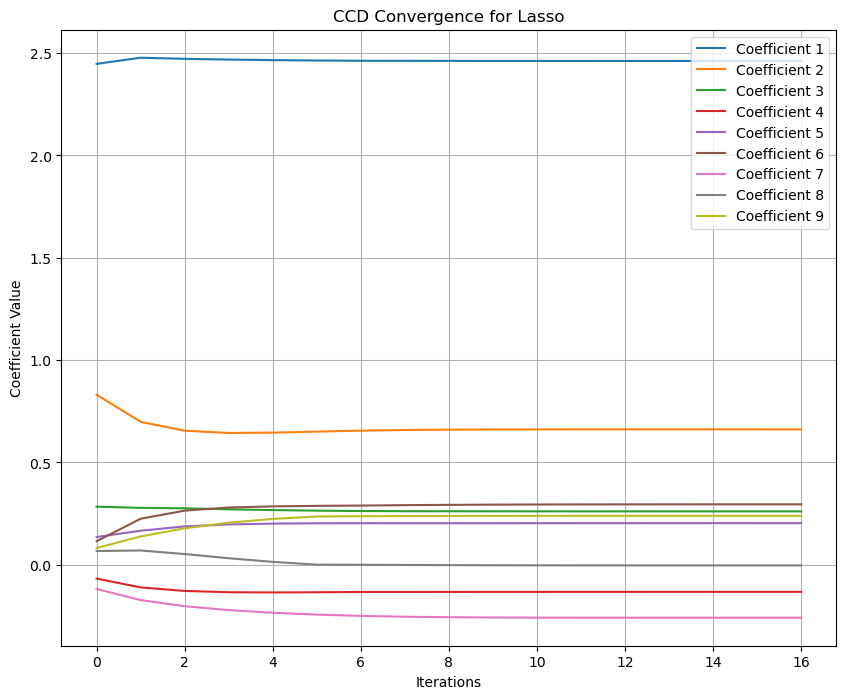

In [21]:
def ccden_convergence(y, X, lam, alpha=1.0, max_iter=1000, tol=1e-4):
    n, p = X.shape
    beta = np.zeros(p)
    beta_prev = beta.copy()
    history = []
    
    for iteration in range(max_iter):
        for j in range(p):

            Xj = X.iloc[:, j] if isinstance(X, pd.DataFrame) else X[:, j]
            y_pred = X.dot(beta)
            rho = Xj.T.dot(y - (y_pred - Xj * beta[j]))
            
            if alpha == 1:  # Lasso
                beta[j] = soft_threshold(rho, lam) / (Xj ** 2).sum()
            else:  # Elastic Net
                beta[j] = soft_threshold(rho, lam * alpha) / ((Xj ** 2).sum() + lam * (1 - alpha))
        
        history.append(beta.copy())

        if np.linalg.norm(beta - beta_prev, ord=1) < tol:
            break
        beta_prev = beta.copy()

    return beta, np.array(history)

lam = 0.3
alpha = 1.0  # Lasso

beta_las, history = ccden_convergence(y_train, X_train, lam, alpha)

plt.figure(figsize=(10, 8))
for i in range(X_train.shape[1]):

    plt.plot(history[:, i], label = f'Coefficient {i+1}')

plt.xlabel('Iterations')
plt.ylabel('Coefficient Value')
plt.title('CCD Convergence for Lasso')
plt.legend()
plt.grid()
plt.show()

***
## Question 3: Lasso/EN solution path

### 3a)
Then transform the obtained estimates to original scale and compute the intercept, i.e., steps 4 amd 5 of `lasso`algorithm (Algorithm 1.1 of Esa's lecture notes). Report the obtained values of regression coefficents  $\hat{\boldsymbol{\beta}}(\lambda,\alpha)$ and intercept $\hat{\beta}_0(\lambda,\alpha)$ when $(\lambda,\alpha) =(0.3,1)$  and $(\lambda,\alpha)= (0,3,0.9)$. Note that former ($\alpha=1$) yields the lasso solution for the original training data $\mathbf{y}$ and $\mathbf{X}$. Compare the found lasso and EN solution with the LSE solution you computed in question 1d). 

In [22]:
# solution
X_train_std = X_train_standardized
X_train_mean = X_train.mean()
y_train_mean = y_train.mean()
X_train_std = np.std(X_train, axis=0)

X_train_std = X_train_std.iloc[1:]
X_train_mean = X_train_mean.iloc[1:]


def transform_coefficients(beta_hat, X_train_std, y_train_mean, X_train_mean):
    beta_transformed = beta_hat / X_train_std
    intercept = y_train_mean - np.dot(X_train_mean, beta_transformed)
    return beta_transformed, intercept

beta_lasso = ccden(y_train_centered, X_train_standardized, b_init, lam, alpha=alpha_lasso)
beta_en = ccden(y_train_centered, X_train_standardized, b_init, lam, alpha=alpha_en)

beta_las_transformed, intercept_las = transform_coefficients(beta_lasso, X_train_std, y_train_mean, X_train_mean)

beta_en_transformed, intercept_en = transform_coefficients(beta_en, X_train_std, y_train_mean, X_train_mean)

# Print the results
print("Lasso Coefficients (Transformed):", beta_las_transformed)
print("Lasso Intercept:", intercept_las)
print("\nElastic Net Coefficients (Transformed):", beta_en_transformed)
print("Elastic Net Intercept:", intercept_en)

Lasso Coefficients (Transformed): lcavol     0.661500
lweight    0.260382
age       -0.132823
lbph       0.203845
svi        0.295314
lcp       -0.257715
gleason   -0.001993
pgg45      0.237668
dtype: float64
Lasso Intercept: 2.466754565431405

Elastic Net Coefficients (Transformed): lcavol     0.662202
lweight    0.260502
age       -0.133407
lbph       0.204304
svi        0.295975
lcp       -0.259667
gleason   -0.003610
pgg45      0.239902
dtype: float64
Elastic Net Intercept: 2.46659701383518


### 3b) 
Implement the pathwise coordinate descent algorithm <code>enpath</code> (described in *Algorithm 1.4* of Esa's lecture notes) that computes the EN solution path over a grid $\lambda_0 > \lambda_1 > \cdots > \lambda_L$ 
values. Note that you should utilize your `ccden`  function you wrote in Problem 2a in your function. The function `generate_lambdas` that  computes the  grid of penalty parameters is provided below: 

In [23]:
def generate_lambdas(X,y,alpha=1,L=100,eps=10**-4):
    """ 
    function to generate a grid of penalty parameter values lambda_0 > lambda_1  > ... > lambda_L
    on log-scale, where lambda_0 is the smallest penalty parameter value 
    yielding an all zero solution, and lambda_j = eps^(1/L) * lambda_(j-1)

        X: the training data of predictors shape (N,p), where norm(X[:,j])**2=N
        y: the training data of responses of 
    alpha: the elastic net penalty parameter (real between [0,1])
       L : Positive integer, the number of lambda values EN/Lasso uses.  
           Default is L=100. 
      eps: Positive scalar, the ratio of the smallest to the 
           largest Lambda value in the grid. Default is eps = 10^-4. 
    output:
      lamgrid: grid of penalty parameters
    """
    assert((np.linalg.norm(X0,axis=0)**2-X0.shape[0]).all() ==0)
    assert(alpha>0 and alpha <= 1)
    N = X.shape[0]
    lam0 = np.linalg.norm(X.T @ y,np.inf)/(N*alpha) # smallest penalty value giving zero solution
    lamgrid = np.power(eps,np.arange(0,L+1)/L)*lam0 # grid of penalty values
    return lamgrid

In [24]:
def enpath(X, y, alpha=1.0, L=100, eps=10**-4, max_iter=1000):
    """
    function to compute the solution of elastic net over l_1-penalty lambda  

        X: the training data of predictors shape (N,p)
        y: the training data of responses of shape (N,) 
        L: Positive integer, the number of lambda values EN/Lasso uses.  
           Default is L=100. 
      eps: Positive scalar, the ratio of the smallest to the 
           largest Lambda value in the grid. Default is eps = 10^-4=lambda_min/lambda_max
      iter: maximum number of iterations
      
    OUTPUT:
      betas: matrix of size (L+1,p) of regression coefficients in the path
      beta0: matrix of size (L+1,) of intercepts

    Note:  generate lambda values using  generate_lambdas and use your previous ccden funcion 
    to compute the regression estimators  
    """
    
    y_mean = np.mean(y)
    y_centered = y - y_mean

    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_standardized = (X - X_mean) / X_std

    lamgrid = generate_lambdas(X_standardized, y_centered, alpha, L, eps)

    betas = np.zeros((L+1, X.shape[1]))
    beta0 = np.zeros(L+1)

    for i, lam in enumerate(lamgrid):
        if i == 0:
            b_init = np.zeros(X.shape[1])
        else:
            b_init = betas[i-1, :]
        
        betas[i] = ccden(y_centered, X_standardized, b_init, lam, alpha=1.0, delta=1e-4, max_iter=10000)

        beta0[i] = y_mean - np.dot(X_mean / X_std, betas[i])

    return betas, beta0

## 3c)
* Then compute the Lasso path (i.e., use $\alpha=1$) and Elastic Net path for $\alpha=0.5$ for the **training data**. 
* Plot the Lasso paths as in the lecturenotes, so using $\sum_{j} | \hat \beta_j(\lambda) | / \sum_{j} |\hat \beta_{LS,j}| $  for values in x-axis for Lasso and $P_{EN}(\hat \beta)/P_{EN}(\hat \beta_{LS})$ for the elastic net. 
<div>
<img src="./figures/figure3dot10.png" width="500"/>
</div>

Your plot should look like the one that is shown above!

_Note_: your lasso path plot should also match with the plot that is shown in Figure 3.10, p. 70, of the ESL book (Hastie et al. 2017).



In [25]:
alpha=0.5

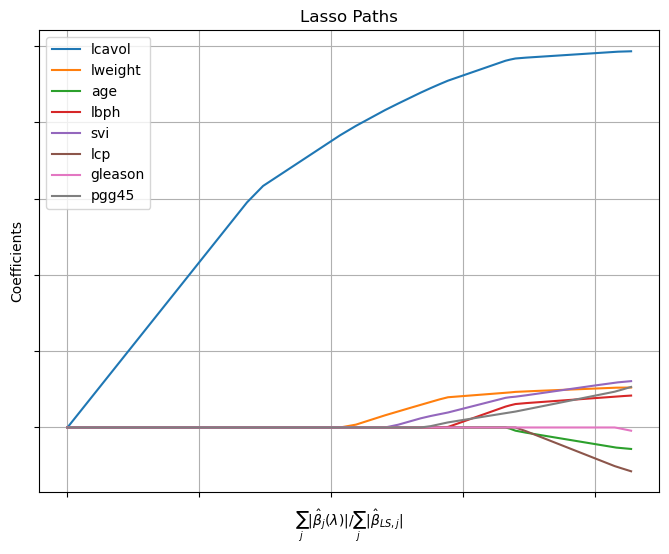

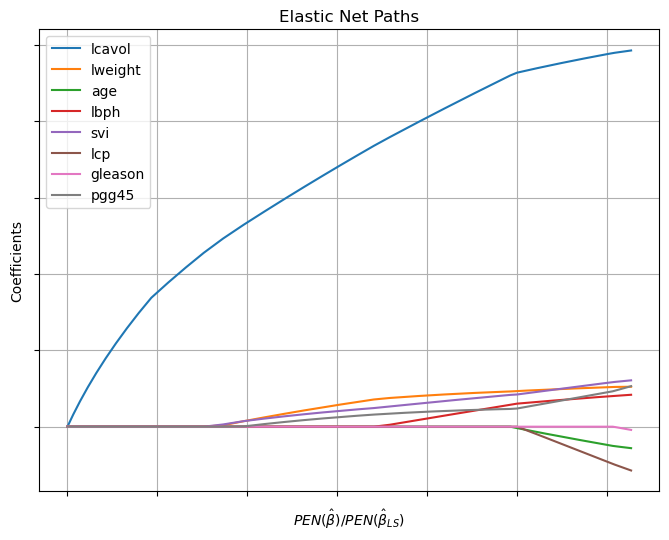

In [26]:
alphas = np.logspace(-8, 2, 200)

alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train, alphas=alphas)

alphas_enet, coefs_enet, _ = enet_path(X_train, y_train, alphas=alphas, l1_ratio=0.5)

lr = LinearRegression().fit(X_train, y_train)
lr_coefs = lr.coef_

lasso_sum = np.sum(np.abs(coefs_lasso), axis=0)
lr_sum = np.sum(np.abs(lr_coefs))
x_lasso = lasso_sum / lr_sum

enet_penalty = np.sum(np.abs(coefs_enet), axis=0) + 0.5 * np.sum(coefs_enet ** 2, axis=0)
lr_penalty = np.sum(np.abs(lr_coefs)) + 0.5 * np.sum(lr_coefs ** 2)
x_enet = enet_penalty / lr_penalty
feature_names = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']

plt.figure(figsize=(8, 6))
for i in range(coefs_lasso.shape[0]):
    if i == 1:
        continue
    plt.plot(x_lasso, coefs_lasso[i, :])
plt.xlabel(r'$\sum_j|\hat{\beta}_j(\lambda)|/\sum_j|\hat{\beta}_{LS,j}|$')
plt.ylabel('Coefficients')
plt.title('Lasso Paths')
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([]) 
plt.legend(feature_names)
plt.grid(True)

plt.figure(figsize=(8, 6))
for i in range(coefs_enet.shape[0]):
    if i == 1:
        continue
    plt.plot(x_enet, coefs_enet[i, :])
plt.xlabel(r'$PEN(\hat{\beta})/PEN(\hat{\beta}_{LS})$')
plt.ylabel('Coefficients')
plt.title('Elastic Net Paths')
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([]) 
plt.grid(True)
plt.legend(feature_names)
plt.show()


### 3d) 
​
Find optimal values of $\lambda$. 
* Extend your previous function <code>enpath</code> so that it takes also the test data set as inputs and returns also the Mean Squared Error Prediction (MSPE) on the **test set** for each value of $\lambda$. 
* Plot MSPE versus lambda for both Lasso and EN and find the optimal (lowest) MSE and corresponding value of lambda. You should get the following figure:
<div>
<img src="figures/mse_vs_log_lambda.png" width="500"/>
</div>

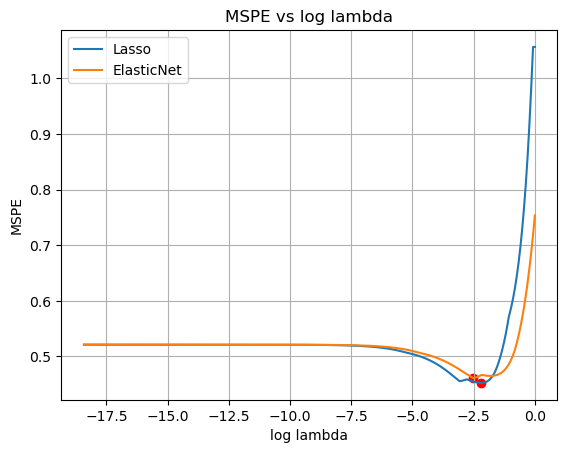

In [27]:
# your code here
def calculate_mspe(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def enpath(X_train, y_train, X_test, y_test, lambda_values):
    lasso_mspes = []
    en_mspes = []
    
    for lam in lambda_values:
        # Fit Lasso
        lasso = Lasso(alpha=lam)
        lasso.fit(X_train, y_train)
        y_pred_lasso = lasso.predict(X_test)
        lasso_mspes.append(calculate_mspe(y_test, y_pred_lasso))
        
        # Fit ElasticNet
        en = ElasticNet(alpha=lam, l1_ratio=0.5)  # l1_ratio can be tuned as needed
        en.fit(X_train, y_train)
        y_pred_en = en.predict(X_test)
        en_mspes.append(calculate_mspe(y_test, y_pred_en))
    
    # Plot the results
    plt.plot(np.log(lambda_values), lasso_mspes, label='Lasso')
    plt.plot(np.log(lambda_values), en_mspes, label='ElasticNet')
    plt.scatter(np.log(lambda_values[np.argmin(lasso_mspes)]), min(lasso_mspes), color='red') # optimal for Lasso
    plt.scatter(np.log(lambda_values[np.argmin(en_mspes)]), min(en_mspes), color='red') # optimal for ElasticNet
    plt.xlabel('log lambda')
    plt.ylabel('MSPE')
    plt.title('MSPE vs log lambda')
    plt.legend()
    plt.grid()
    plt.show()
    
    return lambda_values[np.argmin(lasso_mspes)], min(lasso_mspes), lambda_values[np.argmin(en_mspes)], min(en_mspes)

lambda_values = np.logspace(-8, 0, 500)

optimal_lasso_lambda, optimal_lasso_mspe, optimal_en_lambda, optimal_en_mspe = enpath(
    X_train, y_train, X_test, y_test, lambda_values
)

## Question 4

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler



In the first part of this exercise we looked at a small set of hand-crafted features. While Lasso worked well for the task, its main advantage of exploiting sparsity was not so apparent. Not only is sparsity beneficial from a robustness point-of-view by ignoring "meaningless" features, it also works as a powerful **feature selection** technique. 

We will now look at a different prostate cancer dataset (Singh et al., 2002). In this case we have **12,533** genes which we classify into either `normal` or `tumor` categories. The dataset contains only 102 patients, so the problem is $p \gg n$.

Since this is a classification task, we will use **Logistic Regression** to map predictions into binary categories. Let's first load the dataset:

In [29]:
# Read the data from the CSV file
data = pd.read_csv("./datasets/prostate_genes.csv", sep="\t")

feature_matrix = data.drop("Sample",axis=1)
target_vector = data["Sample"]

data.head(3)

,Sample,31307_at,31308_at,31309_r_at,31310_at,31311_at,31312_at,31313_at,31314_at,31315_at,...,100_g_at,101_at,102_at,103_at,104_at,105_at,106_at,107_at,108_g_at,109_at
0,normal,-11.4,2.7,0.6,4.3,28.0,0.3,-17.5,-5.4,7.5,...,72.8,4.1,2.5,5.0,22.5,7.3,14.0,19.3,-39.5,37.3
1,normal,-1.0,-1.0,0.0,-1.0,3.0,0.0,-3.0,1.0,-2.0,...,25.0,10.0,2.0,4.0,5.0,1.0,6.0,6.0,0.0,26.0
2,normal,-9.0,-19.0,0.0,0.0,76.0,9.0,-57.0,35.0,23.0,...,111.0,-66.0,12.0,14.0,59.0,16.0,-13.0,-10.0,-156.0,-21.0


### 4a)
Center and standardize all predictors to have a mean of zero and unit sample variance. Do this by hand or by using tools from `sklearn`.

In [30]:
# your code
scaler = StandardScaler()

feature_matrix_scaled = scaler.fit_transform(feature_matrix)

feature_matrix_scaled_df = pd.DataFrame(feature_matrix_scaled, columns=feature_matrix.columns)

feature_matrix_scaled_df.head(3)

,31307_at,31308_at,31309_r_at,31310_at,31311_at,31312_at,31313_at,31314_at,31315_at,31316_at,...,100_g_at,101_at,102_at,103_at,104_at,105_at,106_at,107_at,108_g_at,109_at
0,-0.229617,1.064140,0.069672,0.424671,0.040718,0.339205,0.168969,-0.486750,-0.061916,0.195814,...,0.074982,0.481941,-0.357245,-0.527579,0.072205,0.110041,0.477657,0.147562,0.251078,1.351271
1,0.609150,0.527735,-0.074379,-0.360745,-0.776849,0.322815,0.845304,0.038979,-0.614882,0.417462,...,-0.787650,0.747757,-0.415547,-0.570941,-0.711295,-0.519631,-0.152017,-0.201614,0.953329,0.687188
2,-0.036056,-2.081803,-0.074379,-0.212553,1.610446,0.814510,-1.673460,2.831913,0.840291,1.156290,...,0.764366,-2.676315,0.750500,-0.137315,1.706363,0.979587,-1.647492,-0.621676,-1.820119,-2.074929


### 4b)
Encode the labels `normal` and `tumor` to categories expected by sklearns classifiers. Use e.g., the `LabelEncoder`.

In [31]:
# your code
label_encoder = LabelEncoder()

target_vector_encoded = label_encoder.fit_transform(target_vector)

print(target_vector_encoded[:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### Then we split the data to a train and test set

In [32]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, target_vector, test_size=0.15, random_state=0)

### 4d)
Train sklearns `LogisticRegression` classifier **without penalty term**. i.e., set `penalty=None`.

- Evaluate the models accuracy score on the test set
- Count and print the number of coefficients that are non-zero

In [33]:
# train unpenalized logistic regression model

# evaluate the model

# count and print number of non-zero
logreg = LogisticRegression(penalty='none', max_iter=10000)  # 设置 penalty='none' 来移除惩罚项
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"accury: {accuracy}")

non_zero_coefficients = np.sum(logreg.coef_ != 0)
print(f"number of non-zero: {non_zero_coefficients}")

accury: 0.8125
number of non-zero: 12533


### 4e)
Now train a `LogisticRegression` classifier with $\ell_1$ penalty, corresponding to Lasso. Use a regularization strength ($\lambda$) of 5. 
- Evaluate the models accuracy score on the test set
- Count and print the number of coefficients that are non-zero

**Note:** the `LogisticRegression` uses  **inverse** regularization strength for the argument `C` (i.e., $C = 1/\lambda$)

In [34]:
# train logistic regression model with L1 regularization
lasso_lambda = 5

In [35]:
# your code
C_value = 1 / lasso_lambda 
logreg_l1 = LogisticRegression(penalty='l1', C=C_value, solver='liblinear', max_iter=10000)
logreg_l1.fit(X_train, y_train)

y_pred_l1 = logreg_l1.predict(X_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print(f"accuracy: {accuracy_l1}")

non_zero_coefficients_l1 = np.sum(logreg_l1.coef_ != 0)
print(f"number of non-zero: {non_zero_coefficients_l1}")

accuracy: 0.75
number of non-zero: 76


### 4f)
Which genes did Lasso select? Print the names (accession IDs) and coefficient values of selected genes.

Notice that Lasso retained the same accuracy while using only a tiny percentage of the original genes! Lasso is often used as a **feature selection** algorithm for more advanced classification/regression algorithms. For example, we could feed the selected features to a deep learning classifier for potentially even more accuracy.

In [36]:
# your code
coefficients = logreg_l1.coef_[0]

gene_names = feature_matrix_scaled_df.columns

selected_features_indices = np.where(coefficients != 0)[0]

print("names and coefficient values of selected genes:")
for index in selected_features_indices:
    print(f"{gene_names[index]}: {coefficients[index]}")

names and coefficient values of selected genes:
31444_s_at: -0.0022672957059329496
31505_at: 0.0019565348242121987
31509_at: 0.0017912416505625113
31511_at: 0.0002470799170184127
31527_at: 0.0012147273844178691
31557_at: -0.0016777442556601152
31584_at: 0.00030464788856794867
31962_at: 0.00019063086512592737
32395_r_at: 0.0001001822164354277
32412_at: 0.0005104163661866995
32436_at: 0.00025060883879086135
32466_at: 7.385741079747195e-05
33614_at: 0.000817655994988604
34593_g_at: 0.00019761687420976476
35119_at: 0.000336143416632111
32315_at: 0.0008136460470653778
33994_g_at: -2.2256042474468182e-05
35905_s_at: 0.00024946282058049753
36780_at: -0.003607608778753869
37149_s_at: -0.0017561811991197672
38604_at: 0.003798268488663022
39645_r_at: 0.00046900827241368344
41468_at: 0.006196506997535827
32052_at: -0.0030201666012269882
36452_at: -0.0003018577100413265
37639_at: 0.005957516738544642
39775_at: -7.299687845494235e-05
40435_at: 0.0011138304966809114
40448_at: 0.003790502776145562
40